# Loan Prediction Problem

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from statistics import mean
from six import StringIO
from IPython.display import Image
import pydotplus
import graphviz
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler

%matplotlib inline

## **Data Exploration**

In [5]:
# Read input train data
df = pd.read_csv('../data/train_data.csv')

In [6]:
# Display first rows
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [7]:
# Dataframe shape
df.shape

(614, 13)

In [8]:
# Find the datatypes and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## **Data Cleaning and Preprocessing**

In [10]:
# Find empty values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# Find the percentage of missing data
for i in df.columns:
    percentage_missing_column = df[i].isnull().sum()/df.shape[0]
    print(f"Percentage of missing values in {i}: {round(percentage_missing_column*100, 2)}")

Percentage of missing values in Loan_ID: 0.0
Percentage of missing values in Gender: 2.12
Percentage of missing values in Married: 0.49
Percentage of missing values in Dependents: 2.44
Percentage of missing values in Education: 0.0
Percentage of missing values in Self_Employed: 5.21
Percentage of missing values in ApplicantIncome: 0.0
Percentage of missing values in CoapplicantIncome: 0.0
Percentage of missing values in LoanAmount: 3.58
Percentage of missing values in Loan_Amount_Term: 2.28
Percentage of missing values in Credit_History: 8.14
Percentage of missing values in Property_Area: 0.0
Percentage of missing values in Loan_Status: 0.0


In [12]:
# Fill missing values
for i in df.columns:
    if df[i].isnull().sum()>0:
        df[i].fillna(df[i].mode()[0], inplace=True)

C:\Users\car_f\AppData\Local\Temp\ipykernel_2092\337479777.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace=True)


In [13]:
# Find empty values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

C:\Users\car_f\AppData\Local\Temp\ipykernel_2092\1549068040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(df, x='Loan_Status', palette='coolwarm')


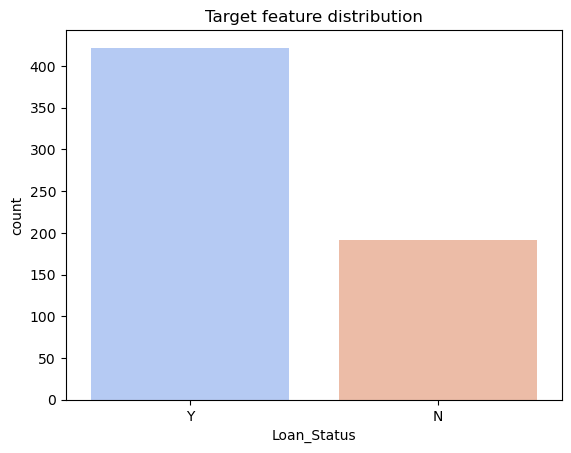

In [18]:
# Verify count for target feature
sb.countplot(df, x='Loan_Status', palette='coolwarm')
plt.title('Target feature distribution')
plt.xticks()
plt.show()

### Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

# label encoder
le = LabelEncoder()

# Perform label encoding in categorical
for i in df.select_dtypes(include='object'):
    df[i] = le.fit_transform(df[i])

df.head()

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0        0       1        0           0          0              0   
1        1       1        1           1          0              0   
2        2       1        1           0          0              1   
3        3       1        1           0          1              0   
4        4       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       120.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             1.0              0            0  
2             1.0              2            1  
3             1.0              2            1  
4             1.0              2            1

### Target and independent variables

In [27]:
# Identify the target and independent variables
X = df.drop('Loan_Status', axis=1) # other independant features
Y = df['Loan_Status'] # target feature

### Split data

In [32]:
from sklearn.model_selection import train_test_split

#Split the data into train and test set 80/20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
print(f"Size of training data: {X_train.shape[0]}")
print(f"Size of test data: {X_test.shape[0]}")

Size of training data: 491
Size of test data: 123


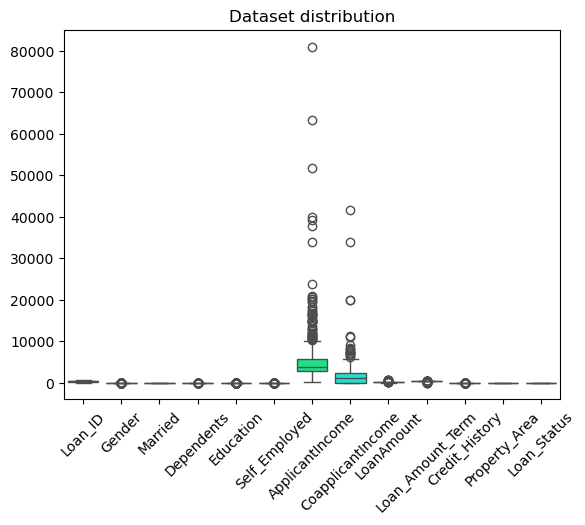

In [34]:
# Visualize the box plot for each column
sb.boxplot(data=df, palette='gist_rainbow')
plt.title('Dataset distribution')
plt.xticks(rotation=45)
plt.show()

### Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

# Perform Standard Scaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

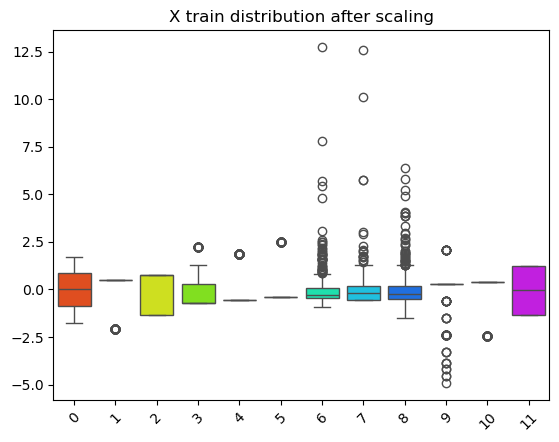

In [38]:
# Visualize the box plot after scaling for each column
sb.boxplot(data=X_train, palette='gist_rainbow')
plt.title('X train distribution after scaling')
plt.xticks(rotation=45)
plt.show()

## ML Modeling

### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, Y_train)
Y_pred = rf_clf.predict(X_test)

print("acc of ramdom forest clf is", metrics.accuracy_score(Y_pred, Y_test))

acc of ramdom forest clf is 0.7723577235772358


In [45]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

### Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Decision tree object
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, Y_train)

# Predict values
Y_pred = dt_clf.predict(X_test)

# Decision Tree accuracy
dt_accuracy = metrics.accuracy_score(Y_pred, Y_test)
print(f"Accuracy for Decision Tree Classifier: {dt_accuracy:.4f}")

Accuracy for Decision Tree Classifier: 0.7073


In [50]:
Y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [52]:
# Classification Report
target_names = ['Loan approved', 'Loan not approved']
print(classification_report(Y_test, Y_pred, target_names=target_names))

                   precision    recall  f1-score   support

    Loan approved       0.59      0.53      0.56        43
Loan not approved       0.76      0.80      0.78        80

         accuracy                           0.71       123
        macro avg       0.68      0.67      0.67       123
     weighted avg       0.70      0.71      0.70       123



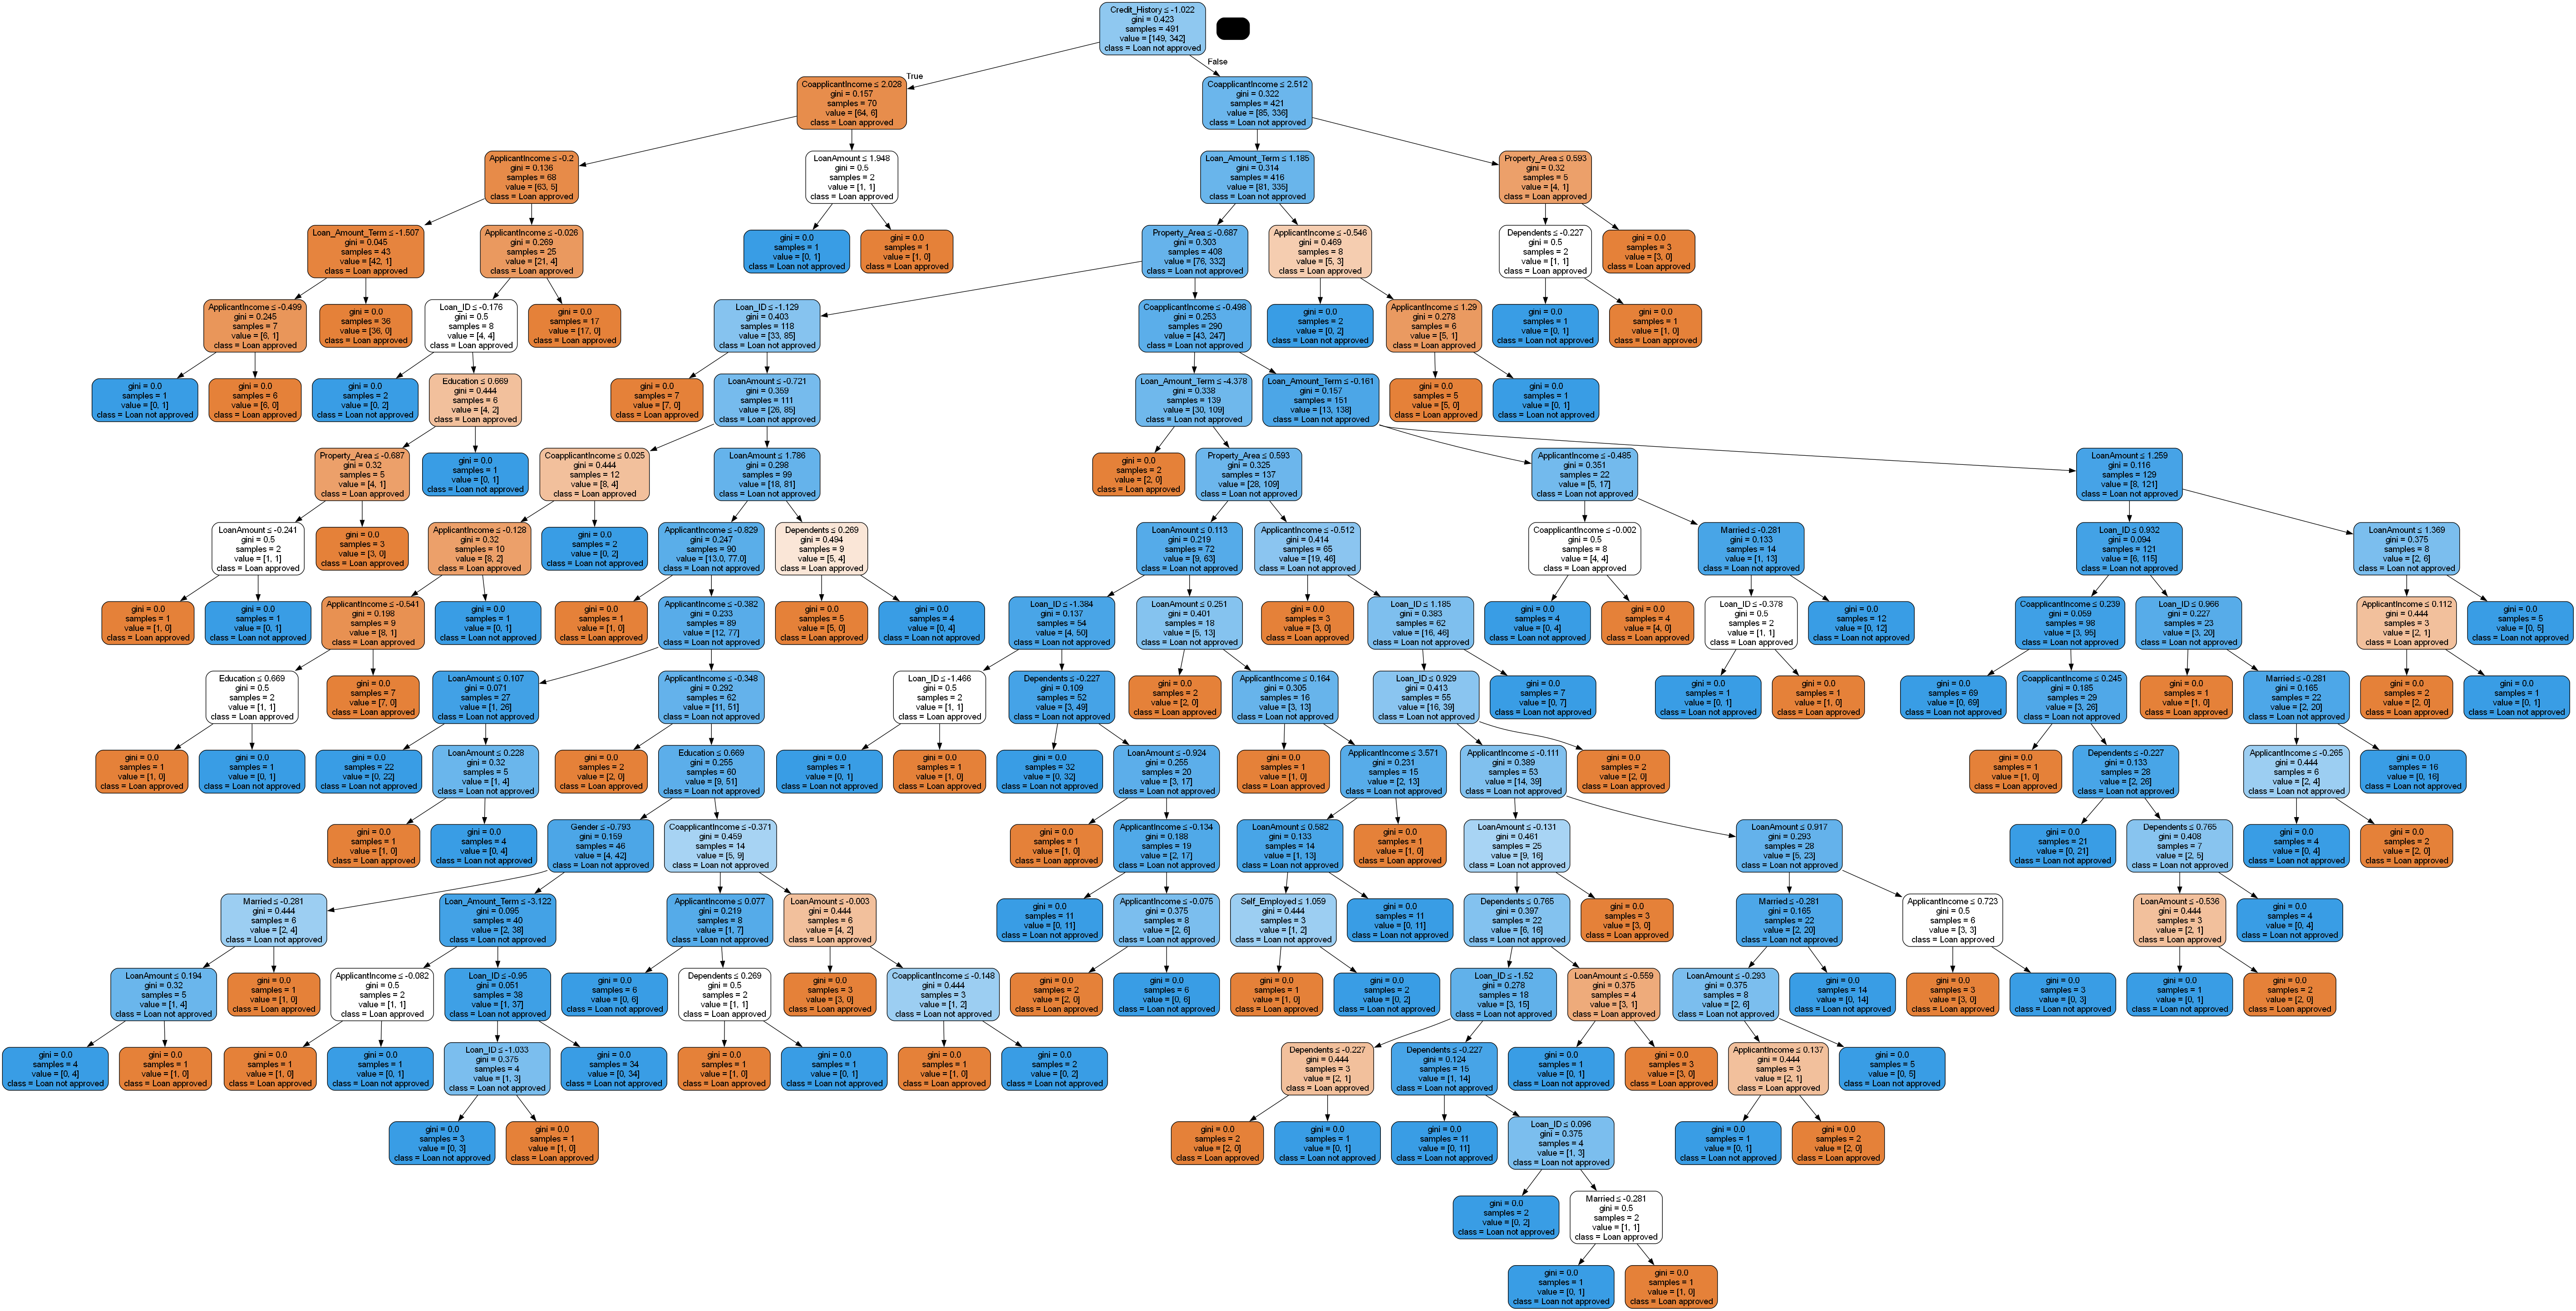

In [54]:
from sklearn.tree import export_graphviz
import pydotplus

# Graph from decision tree
dot_data = StringIO()
export_graphviz(
    dt_clf,
    out_file=dot_data,
    filled=True, rounded=True, special_characters=True,
    feature_names=X.columns,
    class_names=target_names
    )

# Generate and display the graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('loan_prediction.png')
display(Image(filename='loan_prediction.png'))

### KNN

In [157]:
# performing KNN
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [57]:
Y_pred = knn.predict(X_test)
print(f"The accuracy score of KNN is {accuracy_score(Y_test, Y_pred)}")

The accuracy score of KNN is 0.7723577235772358


In [58]:
print(confusion_matrix(Y_test, Y_pred))

[[17 26]
 [ 2 78]]


In [59]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.40      0.55        43
           1       0.75      0.97      0.85        80

    accuracy                           0.77       123
   macro avg       0.82      0.69      0.70       123
weighted avg       0.80      0.77      0.74       123



# Contributions to the project

## Trying other classification models to the experimentation process

### Logistic Regression

In [61]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [62]:
Y_pred_lr = lr.predict(X_test)
print(f"The accuracy score of Logistic Regression is {accuracy_score(Y_test, Y_pred_lr)}")

The accuracy score of Logistic Regression is 0.7886178861788617


In [63]:
print(classification_report(Y_test, Y_pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



### SVM

In [73]:
svc = SVC(probability = True)
svc.fit(X_train, Y_train)

SVC(probability=True)

In [75]:
Y_pred_svc = svc.predict(X_test)
print(f"The accuracy score of SVM is {accuracy_score(Y_test, Y_pred_svc)}")

The accuracy score of SVM is 0.7886178861788617


In [77]:
print(classification_report(Y_test, Y_pred_svc))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



### XGBoost

In [80]:
# !pip install xgboost

In [82]:
import xgboost as xgb

xg_train = xgb.DMatrix(X_train, Y_train)
xg_test = xgb.DMatrix(X_test, Y_test)

In [84]:
xgb_clf = xgb.XGBClassifier(eval_metric='auc') #auc is used for classification
xgb_clf.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [86]:
Y_xgb_pred = xgb_clf.predict(X_test)
print(f'Accuracy of XGBoost: {xgb_clf.score(X_test, Y_test)}')

Accuracy of XGBoost: 0.7804878048780488


In [88]:
print(classification_report(Y_test, Y_xgb_pred))

              precision    recall  f1-score   support

           0       0.83      0.47      0.60        43
           1       0.77      0.95      0.85        80

    accuracy                           0.78       123
   macro avg       0.80      0.71      0.72       123
weighted avg       0.79      0.78      0.76       123



### Plot the AUC-ROC Curve

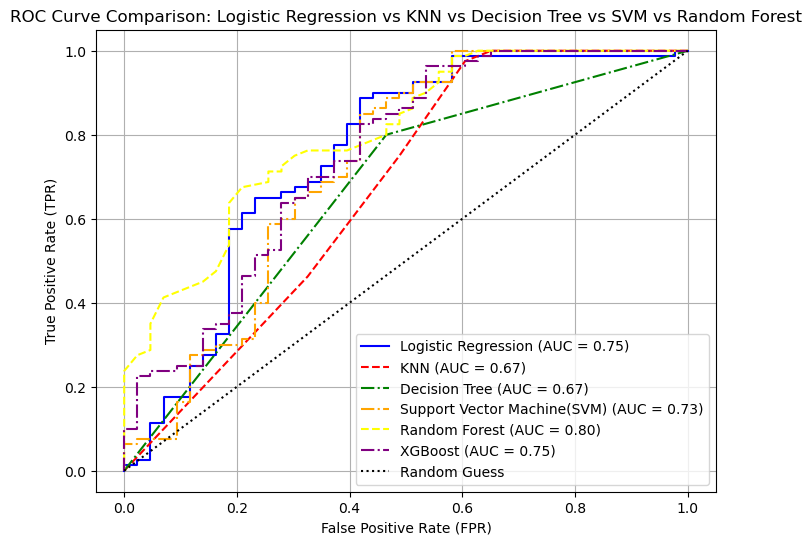

In [103]:
Y_lr_probs = lr.predict_proba(X_test)[:, 1]
Y_knn_probs = knn.predict_proba(X_test)[:, 1]
Y_dt_probs = dt_clf.predict_proba(X_test)[:, 1]
Y_svm_probs = svc.predict_proba(X_test)[:, 1]
Y_rf_probs = rf_clf.predict_proba(X_test)[:, 1]
Y_xgb_probs = xgb_clf.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC for all the models
fpr_lr, tpr_lr, _ = roc_curve(Y_test, Y_lr_probs)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_knn, tpr_knn, _ = roc_curve(Y_test, Y_knn_probs)
auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(Y_test, Y_dt_probs)
auc_dt = auc(fpr_dt, tpr_dt)

fpr_svm, tpr_svm, _ = roc_curve(Y_test, Y_svm_probs)
auc_svm = auc(fpr_svm, tpr_svm)

fpr_rf, tpr_rf, _ = roc_curve(Y_test, Y_rf_probs)
auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, Y_xgb_probs)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', linestyle='dashed', label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', linestyle='dashdot', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_svm, tpr_svm, color='orange', linestyle='dashdot', label=f'Support Vector Machine(SVM) (AUC = {auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='yellow', linestyle='dashed', label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='purple', linestyle='dashdot', label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison: Logistic Regression vs KNN vs Decision Tree vs SVM vs Random Forest")
plt.legend()
plt.grid(True)
plt.show()

The AUC score is very low on every model, only Random Forest with a AUC score of 0.80 is good, all the models have a room for improvement

## Performing Smote to handle the Class Imbalance

In [122]:
smote = SMOTE(sampling_strategy = 'minority')
X,Y = smote.fit_resample(X, Y)

In [125]:
Y.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [129]:
#Split the balanced data into train and test set 80/20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
print(f"Size of training data: {X_train.shape[0]}")
print(f"Size of test data: {X_test.shape[0]}")

Size of training data: 675
Size of test data: 169


Performing again every model, but now with the class imbalance handled

### Models with a balanced class

#### Random Forest

In [140]:
# performing random forest
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, Y_train)

RandomForestClassifier()

In [142]:
Y_pred = rf_clf.predict(X_test)
print("acc of ramdom forest clf is", metrics.accuracy_score(Y_pred, Y_test))

acc of ramdom forest clf is 0.8047337278106509


In [144]:
# Classification Report
target_names = ['Loan approved', 'Loan not approved']
print(classification_report(Y_test, Y_pred, target_names=target_names))

                   precision    recall  f1-score   support

    Loan approved       0.88      0.76      0.81        94
Loan not approved       0.74      0.87      0.80        75

         accuracy                           0.80       169
        macro avg       0.81      0.81      0.80       169
     weighted avg       0.82      0.80      0.81       169



After balancing the class, the Random Forest model improved, increasing its accuracy score from 0.77 to 0.80.

#### Decision Tree

In [148]:
# Perfoming Desicion Tree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [150]:
Y_pred = dt_clf.predict(X_test)
print(f"Accuracy for Decision Tree Classifier: {accuracy_score(Y_pred, Y_test)}")

Accuracy for Decision Tree Classifier: 0.7692307692307693


In [152]:
# Classification Report
target_names = ['Loan approved', 'Loan not approved']
print(classification_report(Y_test, Y_pred, target_names=target_names))

                   precision    recall  f1-score   support

    Loan approved       0.80      0.78      0.79        94
Loan not approved       0.73      0.76      0.75        75

         accuracy                           0.77       169
        macro avg       0.77      0.77      0.77       169
     weighted avg       0.77      0.77      0.77       169



Desision Tree also have a performance improvement, increasing its accuracy from 0.70 to 0.77

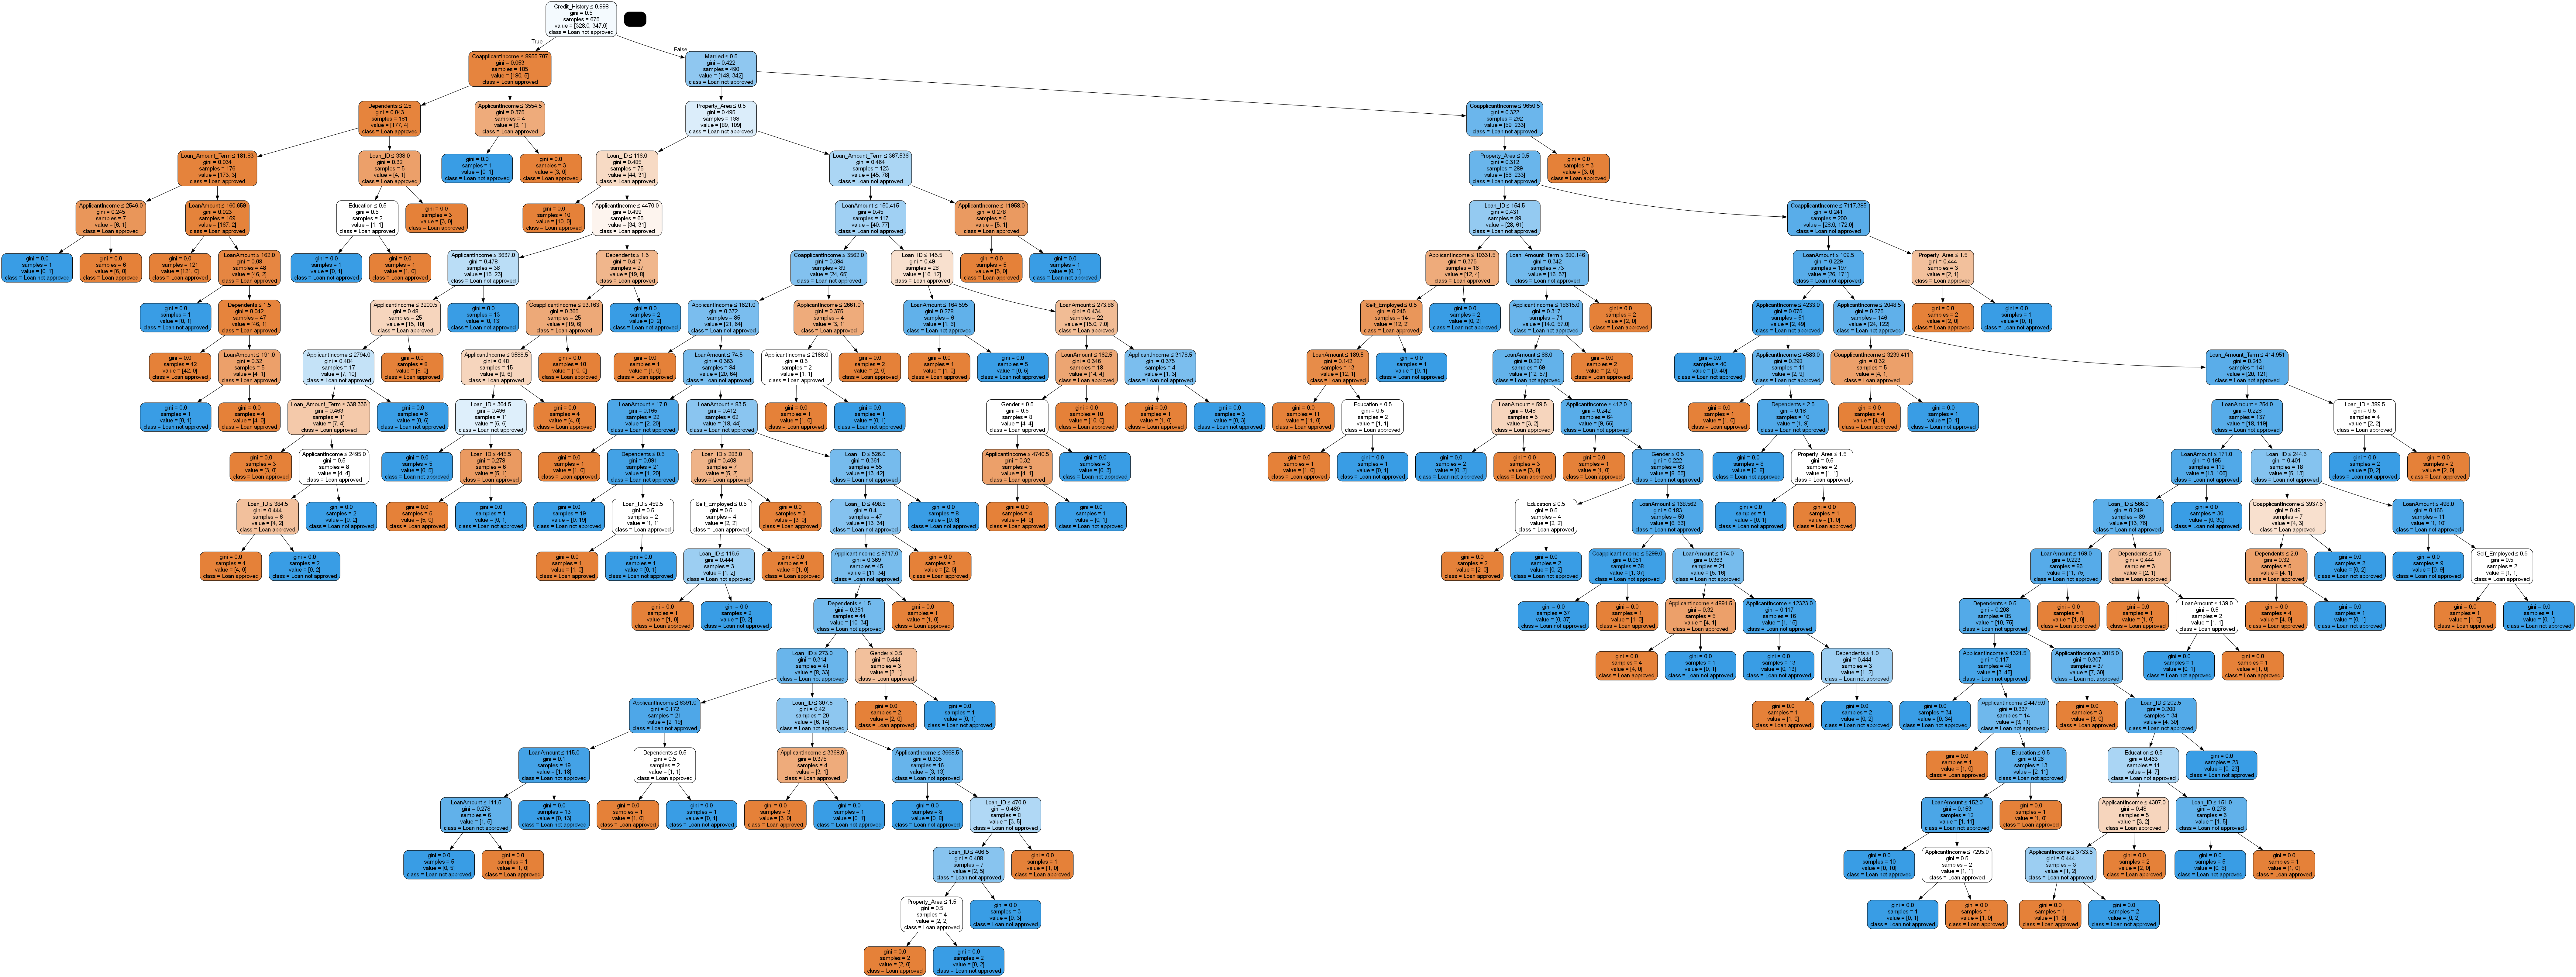

In [154]:
# graf for Decision Tree
dot_data = StringIO()
export_graphviz(
    dt_clf,
    out_file=dot_data,
    filled=True, rounded=True, special_characters=True,
    feature_names=X.columns,
    class_names=target_names
    )

# Generate and display the graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('loan_prediction_SMOTE.png')
display(Image(filename='loan_prediction_SMOTE.png'))

#### KNN

In [159]:
# performing KNN
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [161]:
Y_pred = knn.predict(X_test)
print(f"The accuracy score of KNN is {accuracy_score(Y_test, Y_pred)}")

The accuracy score of KNN is 0.6035502958579881


In [167]:
# Test differents values of K to perform KNN
errors_rate = []
k_values = range(1,51)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(Y_test, Y_pred)
    errors_rate.append(error)

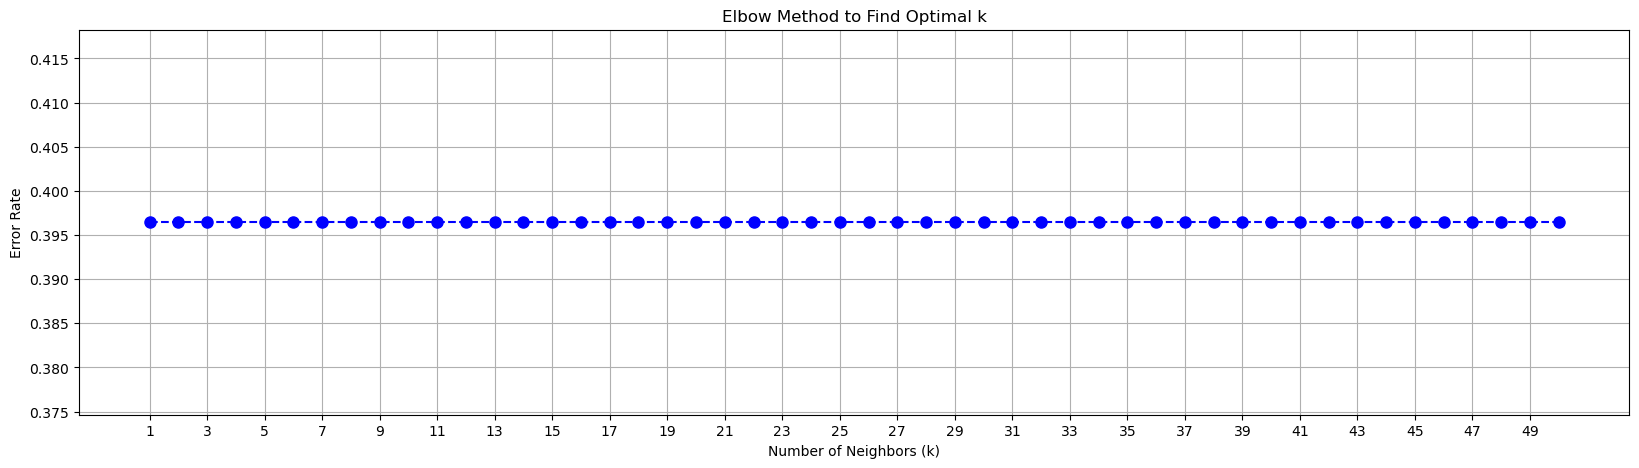

In [170]:
#Plot the elbow curve to find the optimal value of k
plt.figure(figsize=(20, 5))
plt.plot(k_values, errors_rate, marker='o', linestyle='dashed', color='b', markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k')
plt.xticks(np.arange(1, 51, step=2))
plt.grid(True)
plt.show()

In [180]:
# Calculate test accuracy with K value from 1 to 10
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)  # Train the model
    Y_pred = knn.predict(X_test)  # Predict on test set
    print(f"Accuracy score for KNN with {i} neighbors : {accuracy_score(Y_test, Y_pred)}")

Accuracy score for KNN with 1 neighbors : 0.7455621301775148
Accuracy score for KNN with 2 neighbors : 0.6923076923076923
Accuracy score for KNN with 3 neighbors : 0.6331360946745562
Accuracy score for KNN with 4 neighbors : 0.6272189349112426
Accuracy score for KNN with 5 neighbors : 0.6035502958579881
Accuracy score for KNN with 6 neighbors : 0.5976331360946746
Accuracy score for KNN with 7 neighbors : 0.6272189349112426
Accuracy score for KNN with 8 neighbors : 0.6272189349112426
Accuracy score for KNN with 9 neighbors : 0.6035502958579881
Accuracy score for KNN with 10 neighbors : 0.6331360946745562


The accuracy score is higher when K=1

In [190]:
from sklearn.model_selection import cross_val_score

score_k_1 = cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, Y_train, cv=5)
avg_score_k_1 = mean(score_k_1)
print(f"Average score for 1 neighbors: {avg_score_k_1}")

Average score for 1 neighbors: 0.6459259259259259


In [260]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [264]:
Y_knn_pred = knn.predict(X_test)
print(f"Accuracy score of Logistic Regression: {accuracy_score(Y_test, Y_knn_pred)}")

Accuracy score of Logistic Regression: 0.7455621301775148


After all this the accuracy score of KNN decrease from 0.77 to 0.74

#### Logistic Regression

In [210]:
lr = LogisticRegression(max_iter = 10000)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [214]:
Y_pred_lr = lr.predict(X_test)
print(f"The accuracy score of Logistic Regression is {accuracy_score(Y_test, Y_pred_lr)}")

The accuracy score of Logistic Regression is 0.6923076923076923


#### SVM 

In [218]:
svc = SVC(probability = True)
svc.fit(X_train, Y_train)

SVC(probability=True)

In [220]:
Y_pred_svc = svc.predict(X_test)
print(f"The accuracy score of SVM is {accuracy_score(Y_test, Y_pred_svc)}")

The accuracy score of SVM is 0.44970414201183434


In [225]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly']
}

grid_svm = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_svm.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy')

In [228]:
grid_svm.best_estimator_

SVC(C=0.1, kernel='linear')

In [270]:
best_svm = SVC(C = 0.1, kernel = 'linear', probability = True)
best_svm.fit(X_train, Y_train)

SVC(C=0.1, kernel='linear', probability=True)

In [272]:
Y_best_svm_pred = best_svm.predict(X_test)
print(f"Accuracy score for the optimized SVM classifier: {accuracy_score(Y_test, Y_best_svm_pred)}")

Accuracy score for the optimized SVM classifier: 0.6982248520710059


In [274]:
print(classification_report(Y_test, Y_best_svm_pred))

              precision    recall  f1-score   support

           0       0.80      0.61      0.69        94
           1       0.62      0.81      0.71        75

    accuracy                           0.70       169
   macro avg       0.71      0.71      0.70       169
weighted avg       0.72      0.70      0.70       169



Also in SVM the accuracy score decreas from 0.79 to 0.70

#### XGBoost

In [247]:
import xgboost as xgb

xg_train = xgb.DMatrix(X_train, Y_train)
xg_test = xgb.DMatrix(X_test, Y_test)

In [249]:
xgb_clf = xgb.XGBClassifier(eval_metric='auc') #auc is used for classification
xgb_clf.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [251]:
Y_xgb_pred = xgb_clf.predict(X_test)
print(f'Accuracy of XGBoost: {xgb_clf.score(X_test, Y_test)}')

Accuracy of XGBoost: 0.834319526627219


In [253]:
print(classification_report(Y_test, Y_xgb_pred))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        94
           1       0.76      0.91      0.83        75

    accuracy                           0.83       169
   macro avg       0.84      0.84      0.83       169
weighted avg       0.85      0.83      0.83       169



Thanks to class balancing, XGBoost showed improved performance, achieving an accuracy score of 0.83.

#### Plot the AUC-ROC Curve with SMOTE

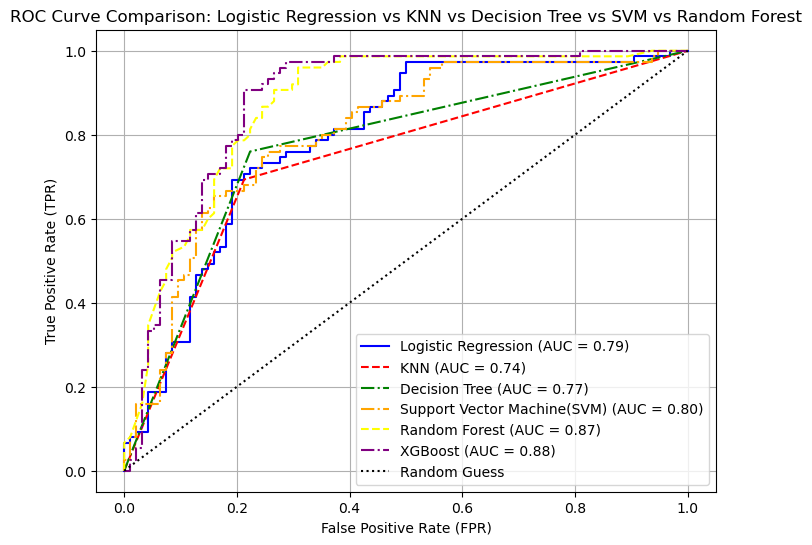

In [277]:
Y_lr_probs = lr.predict_proba(X_test)[:, 1]
Y_knn_probs = knn.predict_proba(X_test)[:, 1]
Y_dt_probs = dt_clf.predict_proba(X_test)[:, 1]
Y_svm_probs = best_svm.predict_proba(X_test)[:, 1]
Y_rf_probs = rf_clf.predict_proba(X_test)[:, 1]
Y_xgb_probs = xgb_clf.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC for all the models
fpr_lr, tpr_lr, _ = roc_curve(Y_test, Y_lr_probs)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_knn, tpr_knn, _ = roc_curve(Y_test, Y_knn_probs)
auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(Y_test, Y_dt_probs)
auc_dt = auc(fpr_dt, tpr_dt)

fpr_svm, tpr_svm, _ = roc_curve(Y_test, Y_svm_probs)
auc_svm = auc(fpr_svm, tpr_svm)

fpr_rf, tpr_rf, _ = roc_curve(Y_test, Y_rf_probs)
auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, Y_xgb_probs)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', linestyle='dashed', label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', linestyle='dashdot', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_svm, tpr_svm, color='orange', linestyle='dashdot', label=f'Support Vector Machine(SVM) (AUC = {auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='yellow', linestyle='dashed', label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='purple', linestyle='dashdot', label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison: Logistic Regression vs KNN vs Decision Tree vs SVM vs Random Forest")
plt.legend()
plt.grid(True)
plt.show()

After performing SMOTE to handle the class imbalance XGBoost is the Model with the best performance